### Demang Paging Algorithms

#### Introduction to the Analysis of Algorithms (3rd ed)
##### Michael Soltys

##### Notebook by Ryan McIntyre

We have defined the ${\it LRU}$, ${\it CLOCK}$, ${\it FIFO}$, ${\it LIFO}$, ${\it LFU}$, and ${\it LFD}$ demand paging algorithms in $\text{paging.py}$.

Now we'll run each of them on some test inputs for comparison. First, we'll try a very basic case: the harddrive is twice as big as the cache, and page requests are random and uniform.

In [7]:
from paging import *
import pandas as pd
import numpy as np

clock = CLOCK(2)
lru = LRU(2)
fifo = FIFO(2)
lifo = LIFO(2)
lfu = LFU(2)

lfd = LFD(2)

max_cache_size = 1000
sample_length = 3000

data = dict()
for s in range(2,max_cache_size+1):
    clock.reset_cache_size(s)
    lru.reset_cache_size(s)
    fifo.reset_cache_size(s)
    lifo.reset_cache_size(s)
    lfu.reset_cache_size(s)
    lfd.reset_cache_size(s)

    sample = np.random.randint(1,2*s+1,size=sample_length)

    for sa in sample:
        clock.process(sa)
        lru.process(sa)
        fifo.process(sa)
        lifo.process(sa)
        lfu.process(sa)
    lfd.process(list(sample))

    if s%50==0:
        print('size :',s)
    data['clock'+str(s)] = clock.fault_count
    data['lru'+str(s)] = lru.fault_count
    data['fifo'+str(s)] = fifo.fault_count
    data['lifo'+str(s)] = lifo.fault_count
    data['lfu'+str(s)] = lfu.fault_count
    data['lfd'+str(s)] = lfd.fault_count
file = open('data/sample_.txt','w')
file.write(str(data))
file.close()

size : 50
size : 100
size : 150
size : 200
size : 250
size : 300
size : 350
size : 400
size : 450
size : 500
size : 550
size : 600
size : 650
size : 700
size : 750
size : 800
size : 850
size : 900
size : 950
size : 1000


And we'll plot the data...

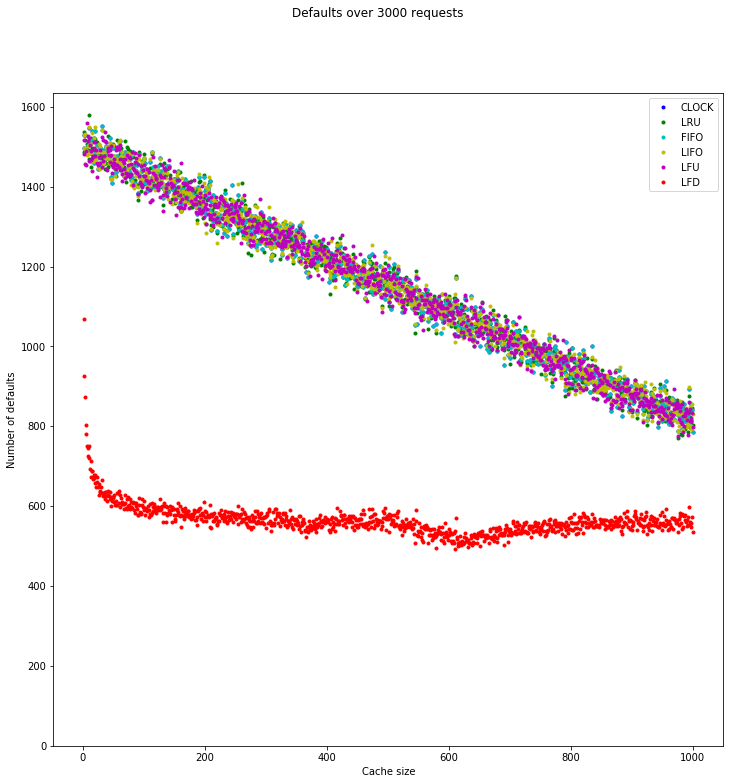

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

X = [i for i in range(2,max_cache_size+1)]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.plot(X,[data['clock'+str(x)] for x in X],'b.',label='CLOCK')
ax.plot(X,[data['lru'+str(x)] for x in X],'g.',label='LRU')
ax.plot(X,[data['fifo'+str(x)] for x in X],'c.',label='FIFO')
ax.plot(X,[data['lifo'+str(x)] for x in X],'y.',label='LIFO')
ax.plot(X,[data['lfu'+str(x)] for x in X],'m.',label='LFU')
ax.plot(X,[data['lfd'+str(x)] for x in X],'r.',label='LFD')
ax.legend()
ax.set_xlabel('Cache size')
ax.set_ylabel('Number of defaults')
ax.set_ylim((0,ax.get_ylim()[1]))
fig.suptitle('Defaults over '+str(sample_length)+' requests')
#plt.tight_layout()
plt.show()